# Neural Network that learns to classify iris flowers
In this program we train a NeuralNetwork (NN) to classify Iris Flowers according to the species they belong to. The Neural Network consists of an input layer, a hidden layer and output layer. 

Input Layer = X matrix (150,4), 150 samples and 4 features
Hidden Layer = 5 neurons
Output Layer = 3 (i.e., one for each class label)

The number of samples is different from these numbers, bc we split the data into a training and testing set. 

We train the NN with 100,000 epochs using forward and backpropagation. Once the Cost from one iteration
to the next is less than 10e-6, we stop training in order to prevent overfitting. 

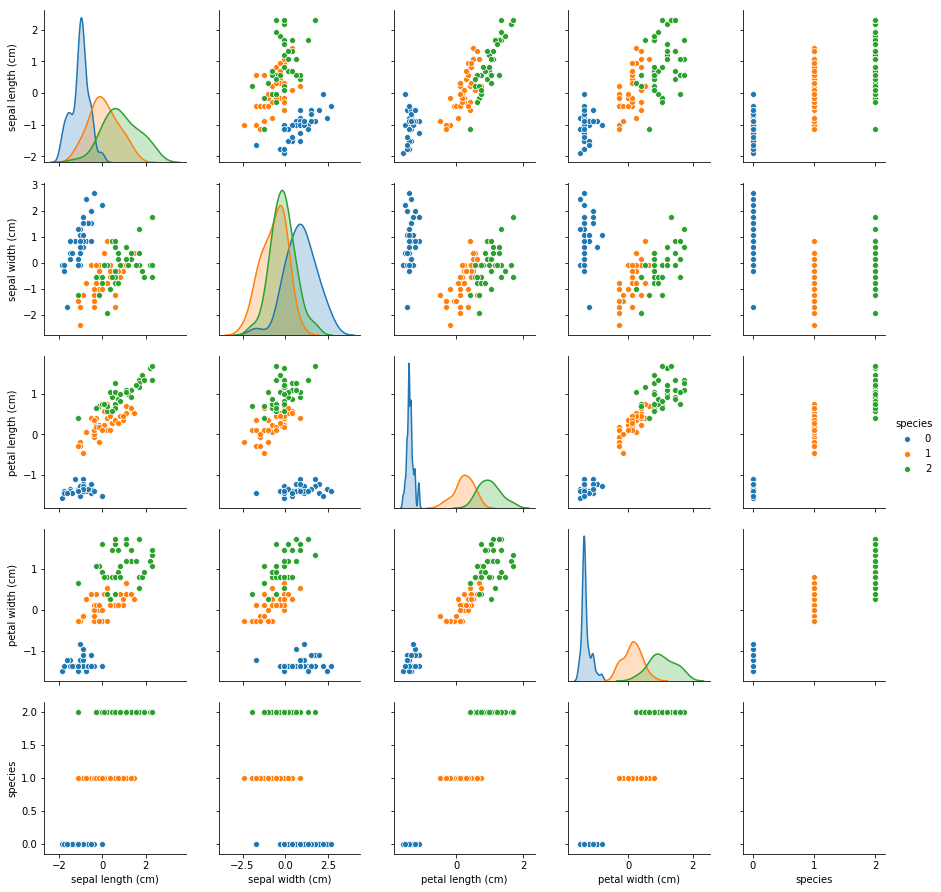

In [101]:
# ========== Part 1: loading the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from math import log
import math
import warnings

iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'],columns = iris['feature_names'])

# adding the target variable to the dataframe
df['species'] = iris['target']

# making it a multiclass classification 
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#y = np.zeros((len(y_train),1))

#for i in range(len(y_train)):
#    y[i] = y_train[i]
    
X = X_train_std

# One-hot encoding of the y-target labels
T = np.zeros((len(y_train),3))
for i in range(len(y_train)):
    if y_train[i] == 0:
        T[i,0] = 1
    elif y_train[i] == 1:
        T[i,1] = 1
    elif y_train[i] == 2:
        T[i,2] = 1

#Ignore warnings
warnings.filterwarnings("ignore")
        
# Making a pairplot of the Training data
df_train = pd.DataFrame(data=X_train_std,columns=iris['feature_names'])
df_train['species'] = y_train
sns.pairplot(df_train,hue='species');

Loss function value:  136.23002315816709
Loss function value:  55.17578452877598
Loss function value:  42.43832027411476
Loss function value:  35.51312344034109
Loss function value:  30.559729767841468
Loss function value:  26.55537861210587
Loss function value:  23.240537293805914
Loss function value:  20.539245152777845
Loss function value:  18.37300325940767
Loss function value:  16.64461314916021
Loss function value:  15.259408220281795
Loss function value:  14.138073877342164
Loss function value:  13.21901975314886
Loss function value:  12.455999631430089
Loss function value:  11.81464950772124
Loss function value:  11.269384103549552
Loss function value:  10.800993391900455
Loss function value:  10.39488763941942
Loss function value:  10.039845221003752
Loss function value:  9.727124220680794
Loss function value:  9.449829956298714
Loss function value:  9.202460967877903
Loss function value:  8.980579613047299
Loss function value:  8.780570251389683
Loss function value:  8.599459

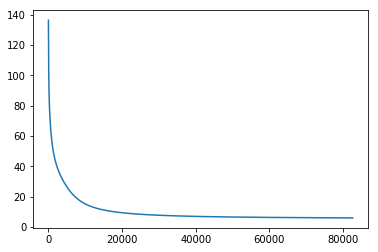

In [102]:
# ========== Part2: here we will build a NeuralNetwork and implement forward and backpropagation

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1,keepdims = True)

class NeuralNetwork(object):        
    def model(self, X, T):
        n_inputs = X.shape[1] # number of features
        output_dim = len(np.unique(y)) # number of classes
        n_neurons = 5 # number of neurons in hidden layer
        epochs = 100000
        alpha = 10e-5 # learning rate
        precision = 10e-6 # stopping criterion to prevent overfitting
        costs = []
        
        # Initializing the Weight matrices and bias vectors np.random.randn
        np.random.seed(1)
        W1 = np.random.randn(n_inputs, n_neurons)
        b1 = np.random.randn(n_neurons)
        W2 = np.random.randn(n_neurons, output_dim)
        b2 = np.random.randn(output_dim)
        
        for i in range(epochs):
            # forward pass
            A = sigmoid(X.dot(W1) + b1) # A = sigma(Z)
            Y = softmax(A.dot(W2) + b2) # Y = softmax(Z2)

            # backward pass
            delta2 = Y - T
            delta1 = (delta2).dot(W2.T) * A * (1 - A)

            W2 -= alpha * A.T.dot(delta2)
            b2 -= alpha * (delta2).sum(axis=0)

            W1 -= alpha * X.T.dot(delta1)
            b1 -= alpha * (delta1).sum(axis=0)
            
            # calculate the loss on every iteration
            loss = np.sum(-T * np.log(Y))
            # saving the loss function values across all training iterations
            costs.append(loss)
            
            if i >= 1:
                new_cost = costs[i]
                prev_cost = costs[i-1]
                if abs(new_cost-prev_cost) < precision:
                    break
  
            # print the loss every 1000 iterations
            if i % 1000 == 0:
                print('Loss function value: ', loss)
                
        return W1,b1,W2,b2,costs,Y
    
W1,b1,W2,b2,costs,Y = NeuralNetwork().model(X,T)
plt.plot(costs)
plt.show()

The Neural Network has an accuracy on the Training Data of 

98.21%


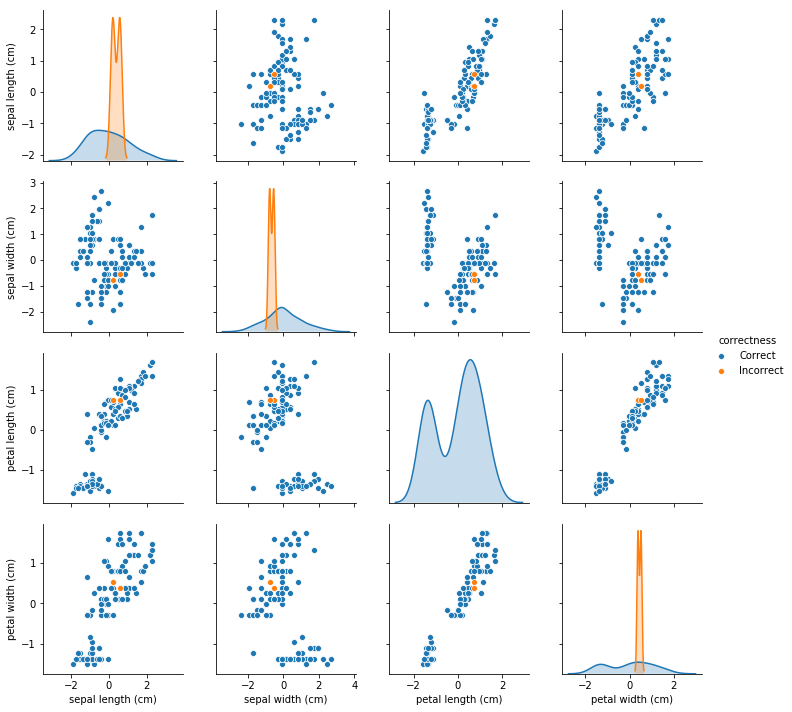

In [103]:
# ========== Part 3: here we look at our predictions on the Training Data and compare them with the actual labels
# Our Y matrix is of the dimension (nr of features X number of classes)
# each row represents the probabilities of each of the three classes, the predicted label will therefore be the
# index of the max value in each row

y_predicted = np.argmax(Y,axis = 1)
correct = y_predicted == y_train

print('The Neural Network has an accuracy on the Training Data of \n')
print("{:.2f}".format(correct.mean()*100) +str("%"))

# adding our predictions to the original training DataFrame to see where the NeuralNetwork went wrong
df_train = pd.DataFrame(data=X_train_std,columns=iris['feature_names'])
df_train['correctness'] = correct
df_train['correctness'] = df_train['correctness'].replace({True: 'Correct',False: 'Incorrect'})

# Plotting the Training data as a function of Correctness to see where the NN went wrong
sns.pairplot(df_train,hue='correctness');

The Neural Network has an accuracy on the Testing Data of 

97.37%


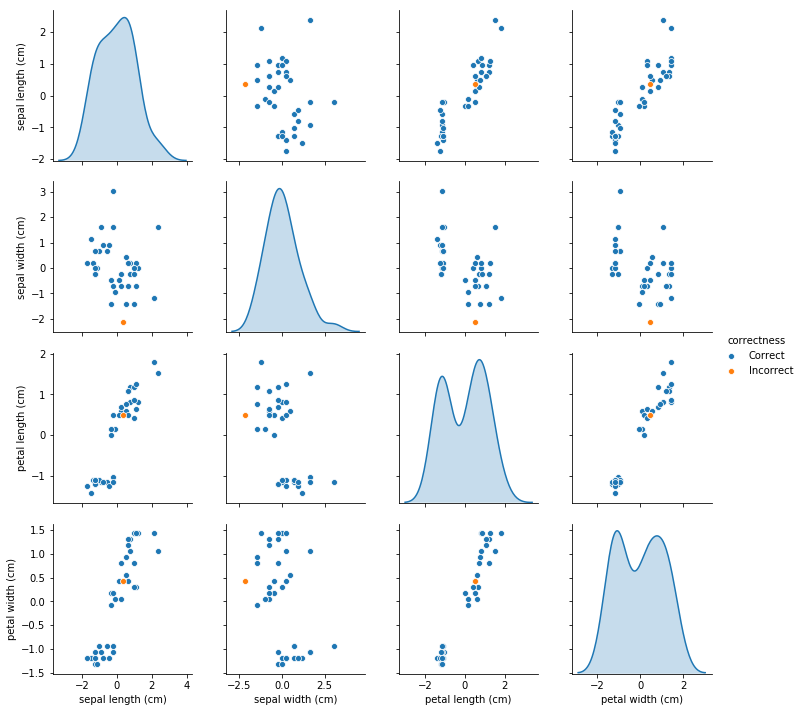

In [104]:
# ========== Part 4: here we look at the performance on the Testing Data    
X = X_test_std

# calculating Y using the weights and biases given by our NN
A = sigmoid(X.dot(W1) + b1) # A = sigma(Z)
Y = softmax(A.dot(W2) + b2)

# getting the index number of the maximum value across rows for our y_test label prediction
y_predicted = np.argmax(Y,axis = 1)

correct = y_predicted == y_test
print('The Neural Network has an accuracy on the Testing Data of \n')
print("{:.2f}".format(correct.mean()*100) +str("%"))

# Plotting the accuracy for our Testing Data
df_test = pd.DataFrame(data=X_test_std,columns=iris['feature_names'])
df_test['correctness'] = correct
df_test['correctness'] = df_test['correctness'].replace({True:'Correct',False:'Incorrect'})
sns.pairplot(df_test,hue='correctness');